In [3]:
import pandas as pd
import pyomo
import matplotlib.pyplot as plt

In [7]:
Hospitals=pd.read_csv(r'../data/hospital_resources/shc_infra.csv', encoding='ISO-8859-1')
##Hospitals/clinics only with intensive care units
Hspls=Hospitals[Hospitals['SL_IPS']==1]
Hspls= Hspls[['KT','Inst','PersA','PersP','BettenStatA','pBettenBelStatA']]
#Hospitals=Hospitals['']
Hspls

,KT,Inst,PersA,PersP,BettenStatA,pBettenBelStatA
0,BS,UniversitÌ_tsspital Basel,913.50,1595.22,633.000000,92.463806
1,GE,Les HÌ«pitaux Universitaires de GenÌ¬ve HUG,1829.32,4498.96,1054.282192,85.289218
2,VD,CHUV Centre Hospitalier Universitaire Vaudois,1653.73,3400.37,929.000000,82.588437
3,ZH,UniversitÌ_tsspital ZÌ_rich,1221.75,2574.21,953.884931,78.680694
4,BE,Insel Gruppe AG (universitÌ_r),1355.66,2739.25,876.298630,83.329008
...,...,...,...,...,...,...
230,GE,Clinique de Carouge,14.78,40.46,15.000000,28.566210
257,ZH,UniversitÌ_ts-Kinderspital ZÌ_rich das Spital ...,302.29,683.98,167.128767,75.649979
258,SG,Ostschweizer Kinderspital,85.25,272.69,74.000000,81.728989
259,BS,UniversitÌ_ts-Kinderspital beider Basel (UKBB),157.55,411.82,118.501370,72.873558


Text(0, 0.5, 'Number of Hospital Beds')

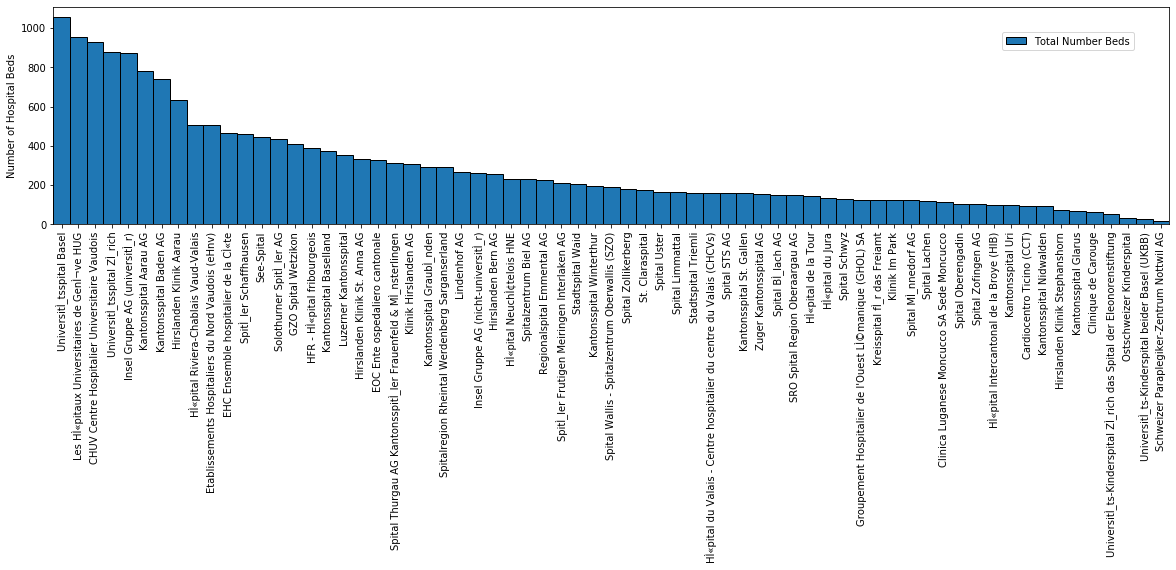

In [16]:
fig, ax = plt.subplots(figsize=(20,4))
width = 1  # the width of the bars
Hospitalsbybeds=Hspls.sort_values(by=['BettenStatA'],ascending=False)
p1 = ax.bar(Hspls['Inst'], Hospitalsbybeds['BettenStatA'], width, label='Total Number Beds',edgecolor = "black")
#p2 = ax.bar(Hospitals['Inst'], Hospitalsbyphysician['PersP'], width,label='Number Nurses',edgecolor = "black",bottom=Hospitalsbyphysician['PersA'])
plt.xlim(-0.5,66.5)
plt.xticks(rotation=90)
plt.legend(loc=[0.85,0.8])
plt.ylabel('Number of Hospital Beds')

Text(0, 0.5, 'Percentage Occupied Beds')

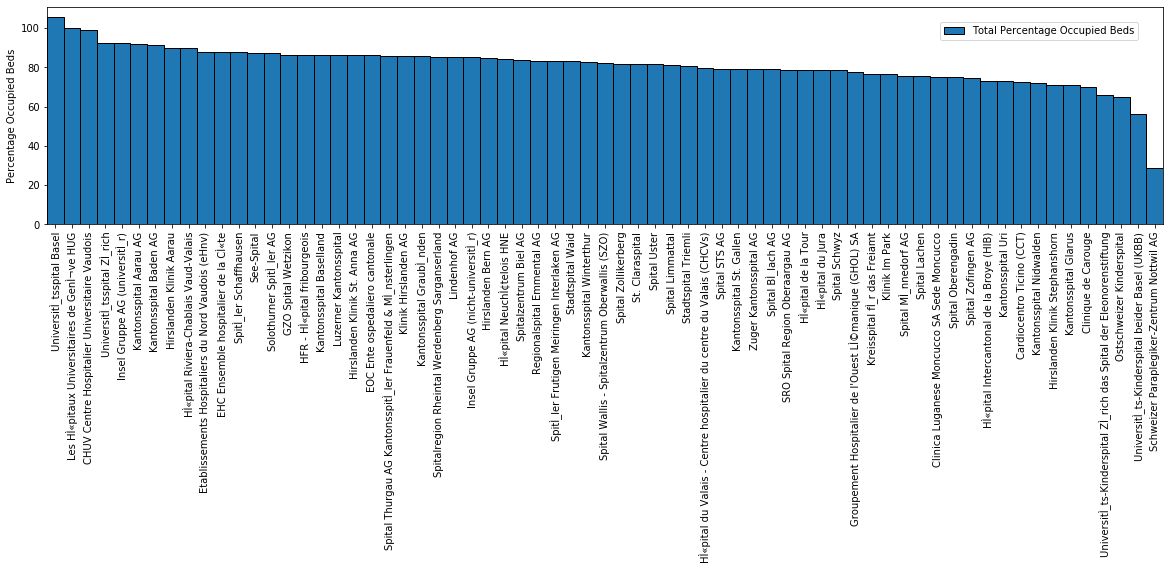

In [15]:
fig, ax = plt.subplots(figsize=(20,4))
width = 1  # the width of the bars
Hospitalsbypbeds=Hspls.sort_values(by=['pBettenBelStatA'],ascending=False)
p1 = ax.bar(Hspls['Inst'], Hospitalsbypbeds['pBettenBelStatA'], width, label='Total Percentage Occupied Beds',edgecolor = "black")
#p2 = ax.bar(Hospitals['Inst'], Hospitalsbyphysician['PersP'], width,label='Number Nurses',edgecolor = "black",bottom=Hospitalsbyphysician['PersA'])
plt.xlim(-0.5,66.5)
plt.xticks(rotation=90)
plt.legend(loc=[0.8,0.85])
plt.ylabel('Percentage Occupied Beds')

Text(0, 0.5, 'Number of Workers')

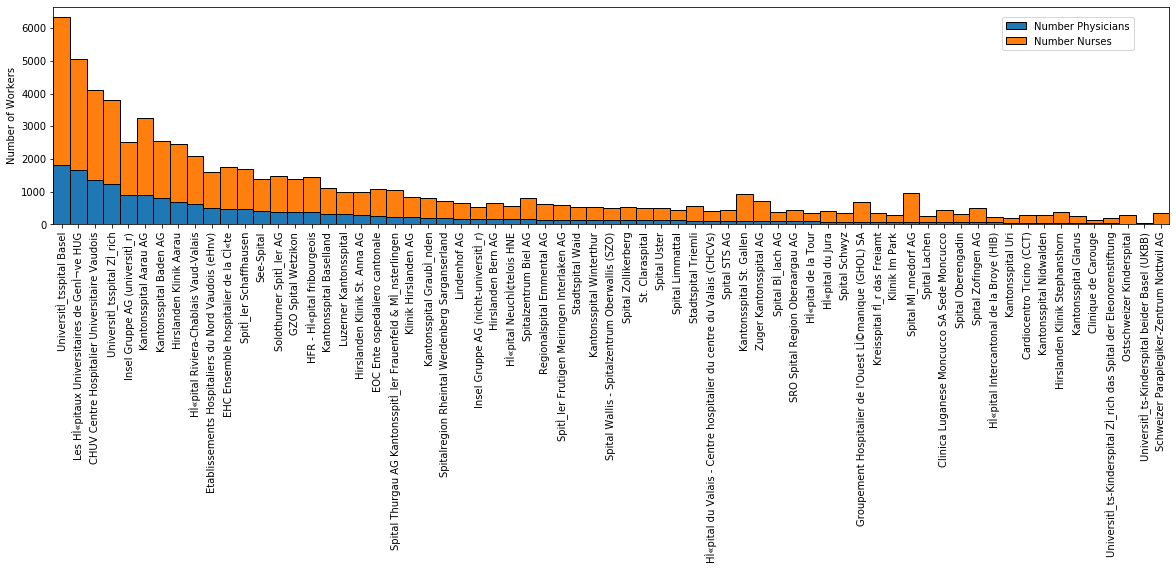

In [14]:
fig, ax = plt.subplots(figsize=(20,4))
width = 1  # the width of the bars
Hospitalsbyphysician=Hspls.sort_values(by=['PersA'],ascending=False)
p1 = ax.bar(Hspls['Inst'], Hospitalsbyphysician['PersA'], width, label='Number Physicians',edgecolor = "black")
p2 = ax.bar(Hspls['Inst'], Hospitalsbyphysician['PersP'], width,label='Number Nurses',edgecolor = "black",bottom=Hospitalsbyphysician['PersA'])
plt.xlim(-0.5,66.5)
plt.xticks(rotation=90)
plt.legend(loc=[0.85,0.8])
plt.ylabel('Number of Workers')

In [41]:
#This is an estimate based on lack of data on the number of ICU beds and number of ventilators per hospital and can be updated with better data
Hspls['ICU_beds']=round(Hspls['BettenStatA']*0.06)
Hspls['Ventilators']=round(Hspls['ICU_beds']*0.74)
#Ventilators.sum()
Hspls.reset_index()
Hspls.to_csv('../data/hospital_resources/Hospital_resources_portia.csv')

847.0